In [1]:
import sympy
from sympy import  Point, Line, Segment, Polygon, RegularPolygon
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
import matplotlib.pyplot as plt

In [2]:
class graph:
  def __init__(this):
    this.ax = plt.gca()
  def normalize(this):
    this.ax.set_aspect('equal')
    this.ax.spines['right'].set_color('none')
    this.ax.spines['top'].set_color('none')
    this.ax.set_ylabel('y')
    this.ax.set_xlabel('x')
    dx = this.ax.get_xlim()[1] - this.ax.get_xlim()[0]
    dy = this.ax.get_ylim()[1] - this.ax.get_ylim()[0]

    if (this.ax.get_ylim()[0] > 0 and this.ax.get_ylim()[1] > 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[0]))
      this.ax.plot(1, this.ax.get_ylim()[0], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[0], transform=this.ax.get_yaxis_transform())
    elif (this.ax.get_ylim()[0] < 0 and this.ax.get_ylim()[1] < 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[1]))
      this.ax.plot(1, this.ax.get_ylim()[1], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[1], transform=this.ax.get_yaxis_transform())
    else:
      this.ax.spines['bottom'].set_position(('data', 0))
      this.ax.plot(1, 0, ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40, transform=this.ax.get_yaxis_transform())

    if (this.ax.get_xlim()[0] > 0 and this.ax.get_xlim()[1] > 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[0]))
      this.ax.plot(this.ax.get_xlim()[0], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[0] + 0.075, 1, transform=this.ax.get_xaxis_transform())
    elif (this.ax.get_xlim()[0] < 0 and this.ax.get_xlim()[1] < 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[1]))
      this.ax.plot(this.ax.get_xlim()[1], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[1], 1, transform=this.ax.get_xaxis_transform())
    else:
      this.ax.spines['left'].set_position(('data', 0))
      this.ax.plot(0, 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3, 1, transform=this.ax.get_xaxis_transform())


  def draw_polygon(this, Polygon, Points, Color):
    vertices = Polygon.vertices
    X = [point.x for point in vertices] + [vertices[0].x]
    Y = [point.y for point in vertices] + [vertices[0].y]
    this.ax.plot(X, Y, Color, alpha=0.5)
    if (len(Points) == 0):
      return
    for i in range(len(vertices)):
      this.ax.annotate(Points[vertices[i]], xy=(vertices[i].x, vertices[i].y), xycoords='data', xytext=(vertices[i].x + 0.05, vertices[i].y + 0.05), textcoords='data')

# Практическое занятие 9
# Компьютерный практикум по алгебре на Python
https://docs.sympy.org/latest/search.html?q=geometry
##  Geometry: многоугольники на плоскости, принадлежность точки многоугольнику.
### Задание 1.
Построить равнобедренный треугольник $ABC$ ($AB = BC$) с вершиной B в начале координат, так что биссектриса $BD$ образует угол 45 градусов с положительным направлением оси $OX$ и 30 градусов со стороной $AB$, точка $A$ расположена между осью $OY$ и лучом $BD$,  длина $AC$ равна 3. 

У полученного треугольника вывести на экран длины сторон.

**Указание:** напротив угла 30 градусов в прямоугольном треугольнике лежит катет, равный половине гипотенузы, в равнобедренном треугольнике биссектриса, проведенная к основанию, является медианой и высотой. Координаты точки равны произведению длины отрезка, соединяющего точку с началом координат и косинуса (синуса) угла, образованного этим отрезком и положительным направлением горизонтальной оси.

{xA: 3*sqrt(2)*(-2 + sqrt(-sqrt(2)*sqrt(2 - sqrt(2))*sqrt(sqrt(2) + 2) + 14))/8, xC: 3*sqrt(2)*(2 + sqrt(-sqrt(2)*sqrt(2 - sqrt(2))*sqrt(sqrt(2) + 2) + 14))/8, yA: 3*sqrt(2)*(2 + sqrt(-sqrt(2)*sqrt(2 - sqrt(2))*sqrt(sqrt(2) + 2) + 14))/8, yC: 3*sqrt(2)*(-2 + sqrt(-sqrt(2)*sqrt(2 - sqrt(2))*sqrt(sqrt(2) + 2) + 14))/8}

{xA: -3*sqrt(2)/4 + 3*sqrt(6)/4, xC: 3*sqrt(2)/4 + 3*sqrt(6)/4, yA: 3*sqrt(2)/4 + 3*sqrt(6)/4, yC: -3*sqrt(2)/4 + 3*sqrt(6)/4}

3

3

3

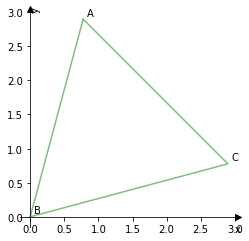

In [3]:
xA, yA, xC, yC = sympy.symbols('xA yA xC yC')
A = Point(xA, yA)
B = Point(0, 0)
C = Point(xC, yC)
D = Point((xA + xC) / 2, (yA + yC) / 2) #медиана

AB = Segment(A, B)
BC = Segment(B, C)
AC = Segment(A, C)
AD = Segment(A, D)

equations = []
equations.append(sympy.Eq(AB.length, BC.length)) #AB = BC
equations.append(sympy.Eq(AC.length, 3)) #AC = 3
equations.append(sympy.Eq(D.x, D.y)) #BD - 45deg
equations.append(sympy.Eq(AD.length, AB.length / 2)) #AD = AB / 2 (30deg)

solutions = sympy.solve(equations)

answer = []
for i in range(len(solutions)):
  if (solutions[i][xA] > 0 and solutions [i][xA] < solutions[i][yA]): #A between OY and BD
    answer = solutions[i]

display(sympy.simplify(answer))
answer = {
    xA: (3 * sympy.sqrt(6) - 3 * sympy.sqrt(2)) / 4,
    yA: (3 * sympy.sqrt(6) + 3 * sympy.sqrt(2)) / 4,
    xC: (3 * sympy.sqrt(6) + 3 * sympy.sqrt(2)) / 4,
    yC: (3 * sympy.sqrt(6) - 3 * sympy.sqrt(2)) / 4
}
display(sympy.simplify(answer))

A = A.subs({xA: sympy.simplify(answer[xA]), yA: sympy.simplify(answer[yA])})
C = C.subs({xC: sympy.simplify(answer[xC]), yC: sympy.simplify(answer[yC])})

ABC = Polygon(A, B, C)
for i in range(len(ABC.sides)):
  display(sympy.simplify(ABC.sides[i].length))


picture = graph()
picture.draw_polygon(ABC, {A: "A", B: "B", C: "C"}, "green")
picture.normalize()

### Задание 2.
Построить четырехугольник $ABCD$, где точки $A$, $B$ и $C$ из Задания 1, а точка $D$ - центр $ABC$. Найти площадь, периметр и центр $ABCD$.
Изобразить $ABC$ и $ABCD$ на графике. Выпуклый ли многоугольник?

Площадь:


3*sqrt(3)/2

Периметр:


2*sqrt(3) + 6

Центр:


Point2D(5*sqrt(6)/12, 5*sqrt(6)/12)

Выпуклый:


False

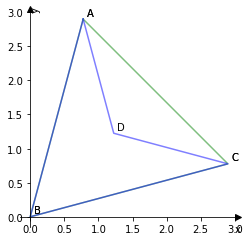

In [4]:
D = ABC.centroid
ABCD = Polygon(A, B, C, D)

picture = graph()
picture.draw_polygon(ABC, {A: "A", B: "B", C: "C"}, "green")
picture.draw_polygon(ABCD, {A: "A", B: "B", C: "C", D: "D"}, "blue")
picture.normalize()

print("\033[95mПлощадь:")
display(ABCD.area)
print("\033[95mПериметр:")
display(ABCD.perimeter)
print("\033[95mЦентр:")
display(ABCD.centroid)
print("\033[95mВыпуклый:")
display(ABCD.is_convex())

### Задание 3
Постоить ромб $ALCD$ с точками $A$, $C$ и $D$ из Заданий 1 и 2. Найти общую часть треугольника $BLC$ и ромба и вывести на экран в виде имен точек, отрезков и т.п., изобразить на графике  треугольник зеленым, ромб - фиолетовым. 

**Указание:** диагонали ромба пересекаются в серединах; имя точки искать в словаре имен.

D
LC
D


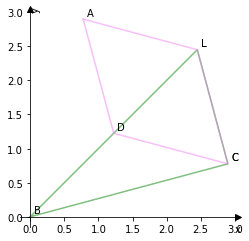

In [5]:
xL, yL = sympy.symbols('xL yL')
L = Point(xL, yL)

equations = []
equations.append(sympy.Eq(Segment(A, L).length, Segment(L, C).length)) #AL = LC
equations.append(sympy.Eq(Segment(A, L).length, Segment(A, D).length)) #AL = AD

solutions = sympy.solve(equations)

def get_point_name(points_list, point_to_find):
  if (point_to_find in points_list):
    return(points_list[point_to_find])
  for point in points_list:
    if (point.distance(point_to_find).evalf() < 1e-10):
      return(points_list[point])

for i in range(len(solutions)):
  L0 = L.subs({xL: solutions[i][xL], yL: solutions[i][yL]})
  ALCD = Polygon(A, L0, C, D)
  if (type(ALCD) != sympy.geometry.polygon.Polygon): #D is also a solution for L
    continue;
  BLC = Polygon(B, L0, C)

  picture = graph()
  picture.draw_polygon(BLC, {B: "B", L0: "L", C: "C"}, "green")
  picture.draw_polygon(ALCD, {A: "A", L0: "L", C: "C", D: "D"}, "violet")
  picture.normalize()

  points = {A: "A", B: "B", C: "C", D: "D", L0: "L"}
  intersection = ALCD.intersection(BLC)
  for i in range(len(intersection)):
    if (type(intersection[i]) == sympy.geometry.line.Segment2D):
      print(f"""{get_point_name(points, intersection[i].p1)}{get_point_name(points, intersection[i].p2)}""")
    elif (type(intersection[i]) == sympy.geometry.point.Point2D):
      print(get_point_name(points, intersection[i]))
    else:
      print(f"""Unhadled type in intersection: {type(intersection[i])}""")

### Индивидуальное задание

Построить на одном графике правильный треугольник, шестиугольник и восьмиугольник с радиусом описанной окружности $R$, центром в точке O.

Повернуть треугольник на $\alpha$ градусов, изобразить старый и новый треугольники на одном графике.

Найти общую область правильного шестиугольника и его копии, повернутой на угол $\beta$ градусов.

Вариант N 2

$R = 10$, $\alpha = 45$, $\beta = 135$, O(-11, -4).

[]

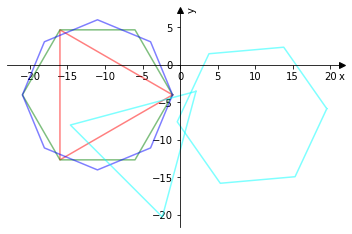

In [8]:
R = 10
alpha = 45
betta = 125
O = Point(-11, -4)
###################################
alpha = alpha / 180 * Pi
betta = betta / 180 * Pi

Poly3 = RegularPolygon(O, R, 3)
Poly6 = RegularPolygon(O, R, 6)
Poly8 = RegularPolygon(O, R, 8)

picture = graph()
picture.draw_polygon(Poly3, {}, 'red')
picture.draw_polygon(Poly6, {}, 'green')
picture.draw_polygon(Poly8, {}, 'blue')

Poly3_2 = Poly3.rotate(alpha)
picture.draw_polygon(Poly3_2, {}, 'cyan')

Poly6_2 = Poly6.rotate(betta)
picture.draw_polygon(Poly6_2, {}, 'cyan')
display(Poly6.intersection(Poly6_2))

picture.normalize()